In [17]:
from scipy.stats import beta
import numpy as np
import pymc3
import matplotlib.pyplot as plt

In [110]:
# Task 1: To calculate the number of infected people in Wuhan

#Evacuated Data: (Feb 3)

# Sweden:  1 confirmed, 11 evacuated
# Germany: 2 confirmed, 124 evacuated
# Japan:   3 confirmed, 206 evacuated
confirmed_list = [2, 1, 3]
evacuated_list = [11, 124, 206]
confirmed_from_evacuated = sum(confirmed_list)
evacuated = sum(evacuated_list)

# Wuhan public data: (Feb 3)
# Wuhan 265 death, 5,142 confirmed, population: 11,081,000
death_Wuhan=265
confirmed_Wuhan=5142
population_Wuhan=11081000
wuhan_published_infectious_rate = confirmed_Wuhan/population_Wuhan

The Infectious rate Intervals = [0.00340765 0.03797859]
The Minimum Number of Infected = 37760.14651092256
The Maximum Number of Infected = 420840.76636063645


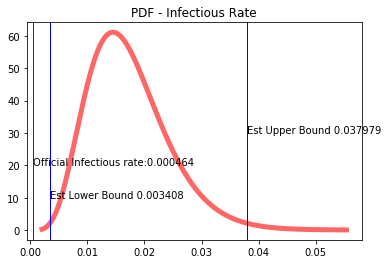

In [111]:
# Draw PDF of beta distribution:
x = np.linspace(beta.ppf(0.0001, a, b),
                beta.ppf(0.9999, a, b), 1000)

fig, ax = plt.subplots(1, 1)
ax.plot(x, beta.pdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='beta pdf')

plt.title('PDF - Infectious Rate')
# Draw the boundry of Hightest Posterior Density
sample = beta.rvs(a,b,size=1000000)
intervals=pymc3.stats.hpd(sample, credible_interval=.99)
ax.axvline(x=intervals[0],linewidth=1, color='b')
ax.axvline(x=intervals[1],linewidth=1, color='b')
ax.axvline(x=wuhan_published_infectious_rate,linewidth=1, color='purple')
ax.text(wuhan_published_infectious_rate,20,"Official Infectious rate:{:2f}".format(wuhan_published_infected_ratio),rotation=0)
ax.text(intervals[0],10,"Est Lower Bound {:2f}".format(intervals[0]),rotation=0)
ax.text(intervals[1],30,"Est Upper Bound {:2f}".format(intervals[1]),rotation=0)
minimum_est_infected = intervals[0]*population_Wuhan
print("The Infectious rate Intervals = {}".format(intervals))
print("The Minimum Number of Infected = {}".format(minimum_est_infected))
print("The Maximum Number of Infected = {}".format(intervals[1]*population_Wuhan))

the official death rate: 0.051536367172306495
the corrected death rate: 0.007001629825875305


Text(0.007001629825875305, 20, 'corrected death rate:0.007')

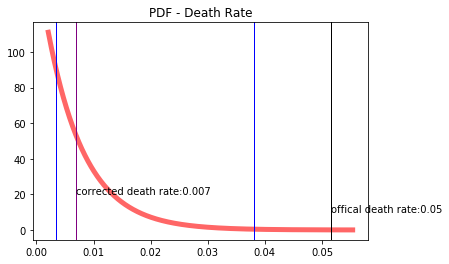

In [107]:
# Task 2: To calculate the death rate
confirmed_worldwide=152
death_worldwide=1

# Draw the PDF of the death rate.
a1, b1 = death_worldwide, confirmed_worldwide
x1 = np.linspace(beta.ppf(0.0001, a1, b1),
                beta.ppf(0.9999, a1, b1), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, beta.pdf(x, a1, b1),
       'r-', lw=5, alpha=0.6, label='beta pdf')
plt.title('PDF - Death Rate')
# Draw the boundry of Hightest Posterior Density
sample_death = beta.rvs(a,b,size=1000000)
intervals_death = pymc3.stats.hpd(sample, credible_interval=.99)
published_death_ratio_Wuhan = death_Wuhan/confirmed_Wuhan
corrected_death_ratio_Wuhan = death_Wuhan/minimum_est_infected
print("the official death rate: {}".format(published_death_ratio_Wuhan))
print("the corrected death rate: {}".format(corrected_death_ratio_Wuhan))
ax.axvline(x=intervals_death[0],linewidth=1, color='b')
ax.axvline(x=intervals_death[1],linewidth=1, color='b')
ax.axvline(x=published_death_ratio_Wuhan,linewidth=1, color='black')
ax.axvline(x=corrected_death_ratio_Wuhan,linewidth=1, color='purple')
ax.text(published_death_ratio_Wuhan,10,"offical death rate:{:.2f}".format(published_death_ratio_Wuhan),rotation=0)
ax.text(corrected_death_ratio_Wuhan,20,"corrected death rate:{:.3f}".format(corrected_death_ratio_Wuhan),rotation=0)